# 1. Importing the required libraries for EDA

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Loading the data into the data frame.

In [2]:
# Read CSV file and check it's attributes before proceeding further.
loan = pd.read_csv("loan.csv", low_memory = False)

In [3]:
# To display the top 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.tail(5)                         # To display the bottom 5 rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Checking the types of data

In [5]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
# Information about the DataFrame
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Checking the DataFrame Shape
loan.shape

# DataFrame is madeup of 39717 Rows and 111 Columns of data

(39717, 111)

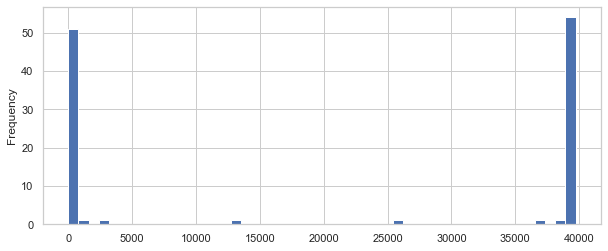

In [8]:
# As we see some columns have missing values and unique values
# Let us do some cleanup of NULLs from rows and columns of the loan dataframe
cl = loan.isnull().sum()
cl.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

###### In the above figure, X-axis contains number of NULL values and Y-axis contains number of columns. We can clearly see that there is a huge spike towards the 40K mark. The total records in our data is 39,717. Obviously  We would not need the columns that have all NULLs. Also, we see there are few columns above 10K mark, but let us analyze those before dropping

In [9]:
cl.loc[(cl.values > 10000) & (cl.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [10]:
loan.drop(columns=list(cl[cl.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

## We dropped those columns with missing data

##### Let us see if there are any columns with unique or single values in them.

In [11]:
# Using the nunique() method returns the number of unique values for each column
column_unique = loan.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

##### We can actually look at those columns with single value and drop them as they will be no use for the analysis

In [12]:
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

##### Drop above columns with values "1"

In [13]:
loan.drop(columns = list(c1.index), inplace=True)
loan.shape

(39717, 44)

- ##### From 111 columns , we came down to 44 with same number of rows so far.

##### The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective. Secondly, fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. Therefore, let us drop all these columns mentioned below

In [14]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d",'earliest_cr_line']
loan.drop(columns=del_cols, inplace=True)
loan.shape

(39717, 28)

In [15]:
customer_be = ['delinq_2yrs','inq_last_6mths','pub_rec','pub_rec_bankruptcies','total_acc','total_pymnt']
loan.drop(columns = customer_be, inplace = True)
loan.shape

(39717, 22)

##### The customer behavior variables are not available at the time of loan application, and this they connot be used as predictors for credit approval.

In [16]:
# Information about the DataFrame
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [17]:
# description of the data in the DataFrame
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,open_acc,revol_bal
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,9.294408,13382.528086
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,4.400282,15885.016641
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,6.000000,3703.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,9.000000,8850.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,12.000000,17058.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,44.000000,149588.000000


## 4. Data preparation

##### let us start with loan status columns to begin with

In [18]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

##### Since loan status "Current" doesn't give any info for our analysis for approving or rejecting application, so dropping this data makes sense

In [19]:
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 22)

##### Let us look at other columns for our analysis take 'term' and see how it can infulence our decision making

In [20]:
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [21]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

##### Let's remove "%" in int_rate column

In [22]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [23]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [24]:
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [25]:
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)


US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64
(28028,)


In [26]:
# Checking the unique values in the emp_length column
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [27]:
# Checking the null counts in emp_length column
loan['emp_length'].isnull().sum()

1033

In [28]:
#Considering only non-null rows
loan = loan[loan.emp_length.notnull()]

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37544 non-null  int64  
 1   funded_amnt          37544 non-null  int64  
 2   funded_amnt_inv      37544 non-null  float64
 3   term                 37544 non-null  object 
 4   int_rate             37544 non-null  float64
 5   installment          37544 non-null  float64
 6   grade                37544 non-null  object 
 7   sub_grade            37544 non-null  object 
 8   emp_title            36136 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       37544 non-null  object 
 11  annual_inc           37544 non-null  float64
 12  verification_status  37544 non-null  object 
 13  issue_d              37544 non-null  object 
 14  loan_status          37544 non-null  object 
 15  purpose              37544 non-null 

##### There are 1033 rows that has no values for emp_length. When we compare to the total number of rows in the data file, 1033 rows doesn't affect the analysis.So, we can safely remove these rows.

In [30]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'open_acc',
       'revol_bal', 'revol_util'],
      dtype='object')

In [31]:
loan['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

#### There are only 3 rows where home_ownership is NONE. Compared to other categories the percentage of NONE category is very minimal and it doesn't affect our analysis. 

In [32]:
loan = loan[loan.home_ownership != 'NONE']

In [33]:
loan['verification_status'].value_counts()

Not Verified       16275
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [34]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

##### Let's split the month and year for better analysis.

In [35]:
month, year = loan['issue_d'].str.split('-').str

In [36]:
year.value_counts()

11    19801
10    11214
09     4716
08     1561
07      249
Name: issue_d, dtype: int64

In [37]:
month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3319
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2330
Feb    2278
Name: issue_d, dtype: int64

##### Let us create new dervied columns like issued_year and issued_month which will be useful for our further analysis and drop the column issue_d.

In [38]:
loan['issue_y'] = pd.to_numeric(year)
loan['issue_m'] = month
loan.drop(columns=['issue_d'], inplace=True)

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,open_acc,revol_bal,revol_util,issue_y,issue_m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,3,13648,83.70%,11,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,3,1687,9.40%,11,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,2,2956,98.50%,11,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,10,5598,21%,11,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,7963,28.30%,11,Dec


In [41]:
loan['purpose'].value_counts()

debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [42]:
len(loan['title'].value_counts())

18845

In [43]:
loan['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [44]:
loan['title'].nunique()

18845

##### Since title column has too many unique values. We don't think we can make any insights out of it. So, let's drop the column title.

In [45]:
loan.drop(columns=['title'], inplace=True)

In [46]:
loan['addr_state'].value_counts()

CA    6767
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1339
GA    1319
MA    1267
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

##### From the above result it's clearly showing that CA, NY, FL are the top 3 states where customers are more.

In [47]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [48]:
#let us convert these values in numberics by removing %
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    37494.000000
mean        48.864625
std         28.340782
min          0.000000
25%         25.425000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

##### It looks like 50% of the borrowers using 49% of the revolving utliziation.

In [49]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37541 non-null  int64  
 1   funded_amnt          37541 non-null  int64  
 2   funded_amnt_inv      37541 non-null  float64
 3   term                 37541 non-null  object 
 4   int_rate             37541 non-null  float64
 5   installment          37541 non-null  float64
 6   grade                37541 non-null  object 
 7   sub_grade            37541 non-null  object 
 8   emp_title            36135 non-null  object 
 9   emp_length           37541 non-null  object 
 10  home_ownership       37541 non-null  object 
 11  annual_inc           37541 non-null  float64
 12  verification_status  37541 non-null  object 
 13  loan_status          37541 non-null  object 
 14  purpose              37541 non-null  object 
 15  addr_state           37541 non-null 

In [50]:
loan.shape

(37541, 22)

In [51]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,issue_y
count,37541.000000,37541.000000,37541.000000,37541.000000,37541.000000,3.754100e+04,37541.000000,37541.000000,37541.000000,37494.000000,37541.000000
mean,11119.771050,10853.980315,10281.190004,11.963580,324.662009,6.940618e+04,13.284309,9.298660,13364.209051,48.864625,10.298767
std,7354.173376,7096.389049,7033.976024,3.683037,208.903386,6.467839e+04,6.660676,4.396339,15895.498352,28.340782,0.888736
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,7.000000
25%,5500.000000,5400.000000,5000.000000,8.940000,167.380000,4.100000e+04,8.160000,6.000000,3693.000000,25.425000,10.000000
50%,10000.000000,9600.000000,8850.000000,11.830000,280.000000,6.000000e+04,13.380000,9.000000,8841.000000,49.300000,11.000000
75%,15000.000000,15000.000000,14075.000000,14.420000,429.040000,8.300000e+04,18.550000,12.000000,17009.000000,72.400000,11.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,44.000000,149588.000000,99.900000,11.000000


Let us now take the percentage of loans Fully paid vs charged off for all the records before going into further analysis

In [52]:
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.856184
Charged Off    0.143816
Name: loan_status, dtype: float64

##### There are about 85% fully paid and 15% Charged Off borrowers.

#### Drop Duplicate Rows

In [53]:
print ("Before dropping duplicate rows: ", loan.shape)
loan.drop_duplicates()
print ("After dropping duplicate rows: ", loan.shape)

Before dropping duplicate rows:  (37541, 22)
After dropping duplicate rows:  (37541, 22)


In [54]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

###### Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

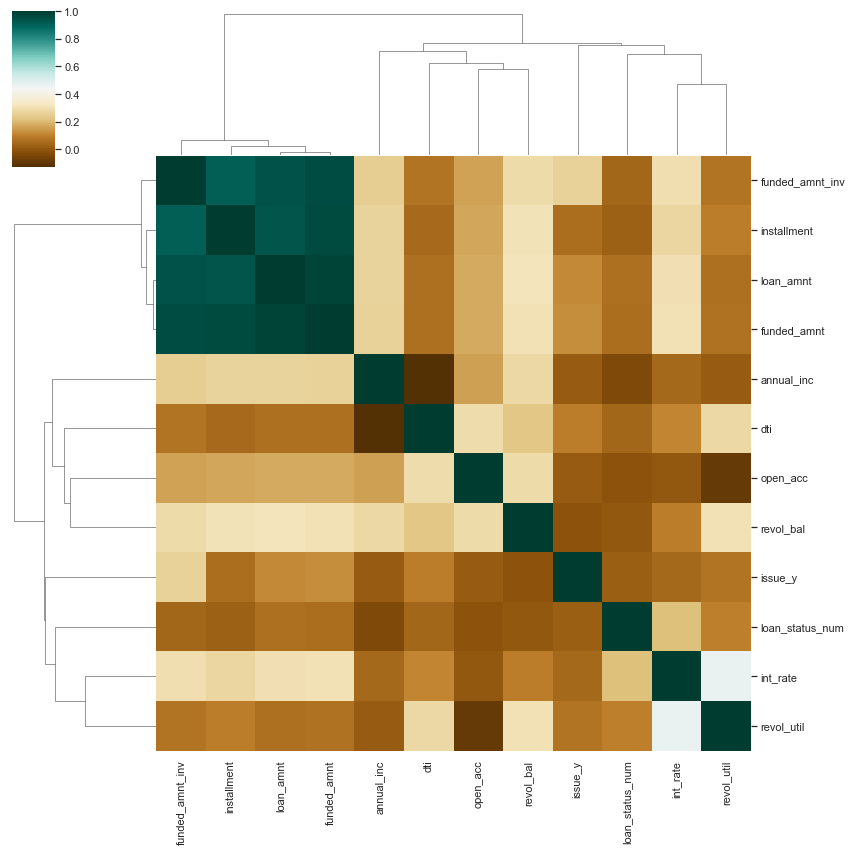

In [55]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='BrBG', figsize=(12,12))
plt.show()

##### Since we know darker the value higher the correlation , we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation these fields are proportional to each other. 

## Univariate Analysis

In [56]:
loan['loan_amnt'].describe()

count    37541.000000
mean     11119.771050
std       7354.173376
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [57]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37541 non-null  int64  
 1   funded_amnt          37541 non-null  int64  
 2   funded_amnt_inv      37541 non-null  float64
 3   term                 37541 non-null  object 
 4   int_rate             37541 non-null  float64
 5   installment          37541 non-null  float64
 6   grade                37541 non-null  object 
 7   sub_grade            37541 non-null  object 
 8   emp_title            36135 non-null  object 
 9   emp_length           37541 non-null  object 
 10  home_ownership       37541 non-null  object 
 11  annual_inc           37541 non-null  float64
 12  verification_status  37541 non-null  object 
 13  loan_status          37541 non-null  object 
 14  purpose              37541 non-null  object 
 15  addr_state           37541 non-null 

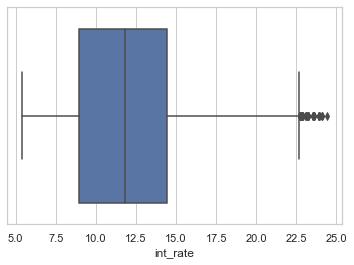

In [58]:
sns.boxplot(loan.int_rate)
loan.int_rate.describe()
plt.show()

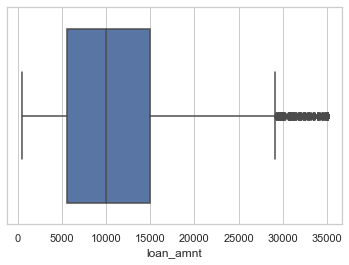

In [59]:
sns.boxplot(loan.loan_amnt)
loan.loan_amnt.describe()
plt.show()

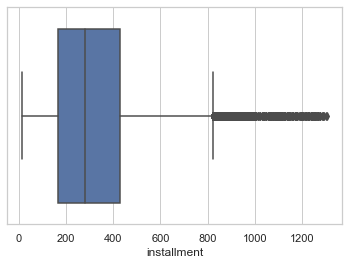

In [60]:
sns.boxplot(loan.installment)
loan.installment.describe()
plt.show()

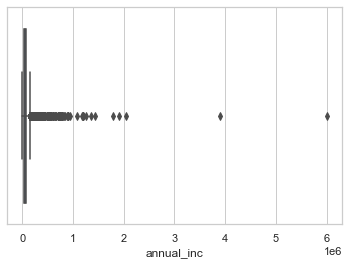

In [61]:
sns.boxplot(loan.annual_inc)
loan.annual_inc.describe()
plt.show()

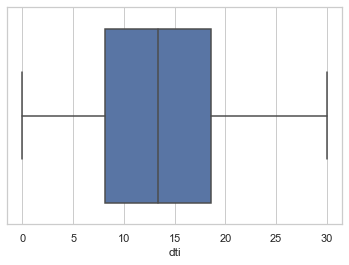

In [62]:
sns.boxplot(loan.dti)
loan.dti.describe()
plt.show()

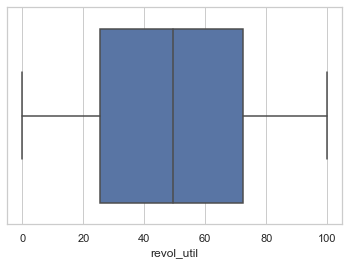

In [63]:
sns.boxplot(loan.revol_util)
loan.revol_util.describe()
plt.show()

#### From above findings we can conclude that column annual_inc have few outliers and no other columns have an outlier

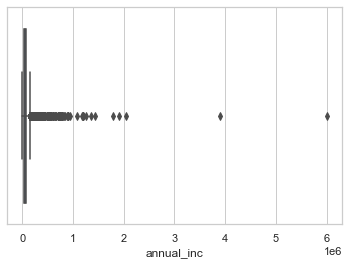

In [64]:
sns.boxplot(loan.annual_inc)
loan.annual_inc.describe()
plt.show()

In [65]:
loan_quant = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])
loan_quant

0.50      60000.0
0.75      83000.0
0.90     116664.0
0.95     142000.0
0.97     166240.0
0.98     189996.0
0.99     235000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

- Outliers above 95 percentile removed

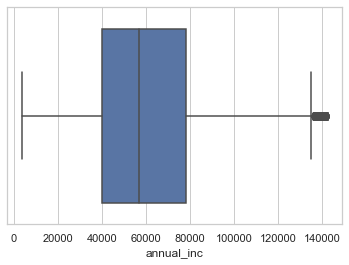

In [66]:
quant_95 = loan['annual_inc'].quantile(0.95)
loan = loan[loan['annual_inc'] <= quant_95]
sns.boxplot(loan['annual_inc'])
plt.show()

### Loan Status

Fully Paid     30476
Charged Off     5196
Name: loan_status, dtype: int64


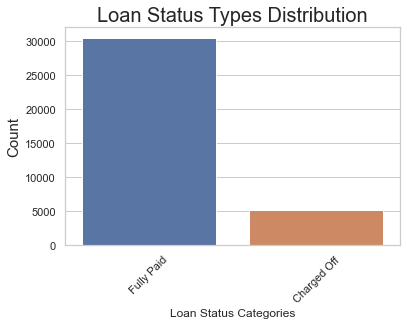

In [67]:
print(loan["loan_status"].value_counts())
g =sns.countplot(loan["loan_status"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
plt.show()

##### Insights : Majority of loans are Fully paid and charged off loans are about 14.3% of the total loans

### Term

 36 months    26950
 60 months     8722
Name: term, dtype: int64


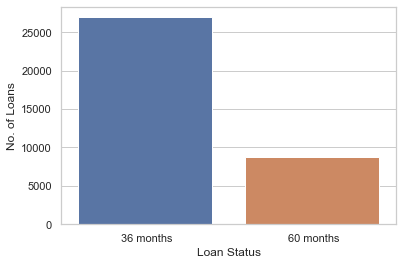

In [68]:
print(loan["term"].value_counts())
sns.countplot(loan["term"]).set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

##### Insights : Number of loans borrowed for the term of 36 months is more as compared to the Number of loans borrowed for the term of 60 months

### Grade

B    10799
A     9275
C     7324
D     4736
E     2407
F      869
G      262
Name: grade, dtype: int64


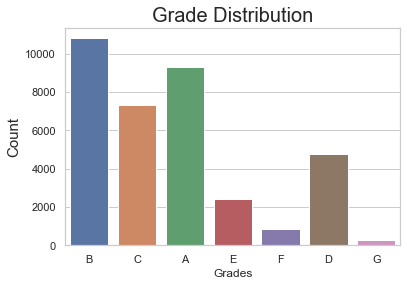

In [69]:
print(loan["grade"].value_counts())
g = sns.countplot(loan["grade"])
g.set_xlabel("Grades", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Grade Distribution", fontsize=20)
plt.show()

##### Insights : Maximum loans are given to A, B and C grade applicants 

## Home_ownership

RENT        17638
MORTGAGE    15289
OWN          2652
OTHER          93
Name: home_ownership, dtype: int64


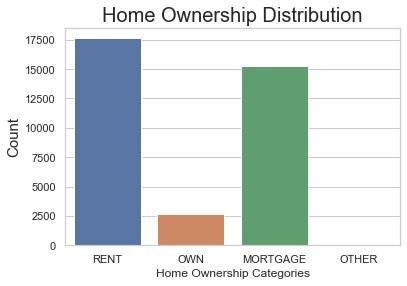

In [70]:
print(loan["home_ownership"].value_counts())
g = sns.countplot(loan["home_ownership"])
g.set_xlabel("Home Ownership Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Home Ownership Distribution", fontsize=20)
plt.show()

##### Insights: Majority of the borrowers are living in the Rented house and 2nd majority of the borrowers are with the mortgaged homes.

### Verification status

Not Verified       15871
Verified           10814
Source Verified     8987
Name: verification_status, dtype: int64


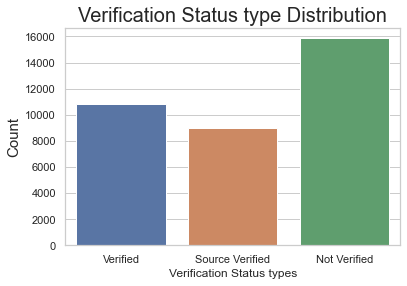

In [71]:
print(loan["verification_status"].value_counts())
g= sns.countplot(loan["verification_status"])
g.set_xlabel("Verification Status types", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Verification Status type Distribution", fontsize=20)

plt.show()

##### Insights: Maximum Number of loans are Not Verified and these 'Not Verified' customers are potential risk to the business.

### Purpose

debt_consolidation    16940
credit_card            4661
other                  3548
home_improvement       2475
major_purchase         1980
small_business         1586
car                    1400
wedding                 883
medical                 617
moving                  527
vacation                338
house                   325
educational             305
renewable_energy         87
Name: purpose, dtype: int64


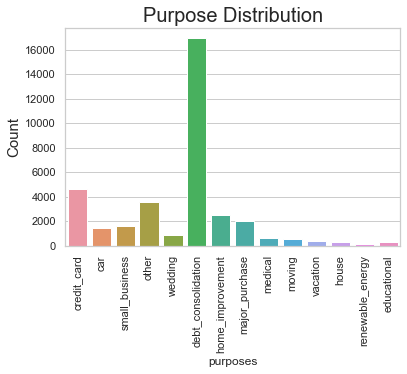

In [100]:
print(loan["purpose"].value_counts())
g = sns.countplot(loan["purpose"])
g.set_xlabel("purposes", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Purpose Distribution", fontsize=20)
plt.xticks(rotation=90)
plt.show()

##### Insights: Majority of loans are taken for the debt consolidation purpose.

## Emp_lenght

10+ years    7893
< 1 year     4329
2 years      4105
3 years      3830
4 years      3202
5 years      3047
1 year       3047
6 years      2076
7 years      1644
8 years      1345
9 years      1154
Name: emp_length, dtype: int64


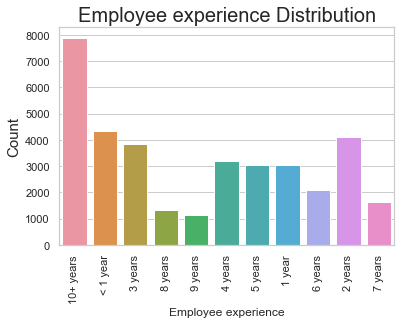

In [102]:
print(loan["emp_length"].value_counts())
g= sns.countplot(loan["emp_length"])
g.set_xlabel("Employee experience", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Employee experience Distribution", fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### Insights : Applicants who have 10+ years and <1 year of experience are more for the loan.

## Issue_y

In [74]:
plt.figure(figsize=(8,8))
g_data = loan.groupby('issue_y')['loan_status'].count()
g_data

issue_y
7       228
8      1488
9      4481
10    10713
11    18762
Name: loan_status, dtype: int64

<Figure size 576x576 with 0 Axes>

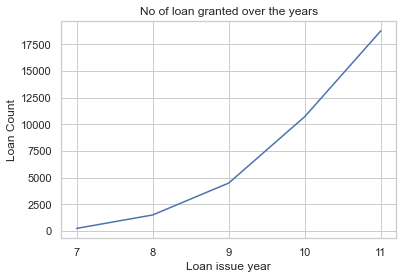

In [75]:
g_data.plot.line(x_compat=True)
plt.xticks(np.arange(min(g_data.index), max(g_data.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan issue year')
plt.ylabel('Loan Count')
plt.show()

##### Insights: From the above graph it shows as over the years the number of approved loans been increased.

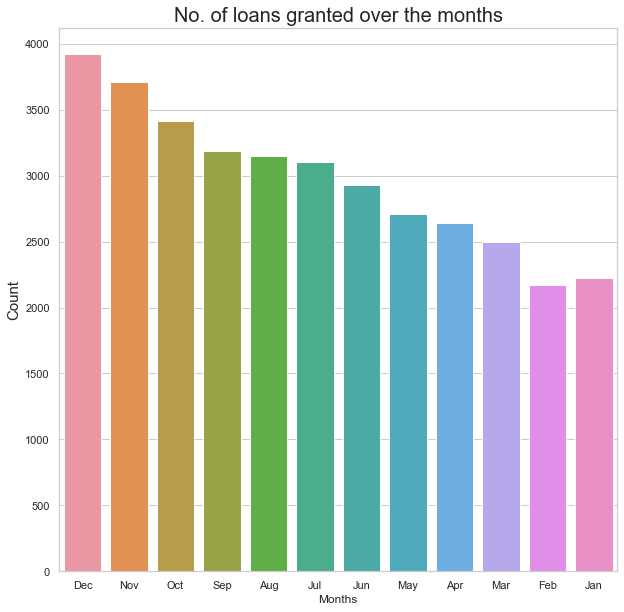

In [107]:
plt.figure(figsize=(10,10))
g =sns.countplot(loan["issue_m"])
g.set_xlabel("Months", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("No. of loans granted over the months", fontsize=20)
plt.show()

##### Insights: It seems like during December more number of customers are applying for the loan.

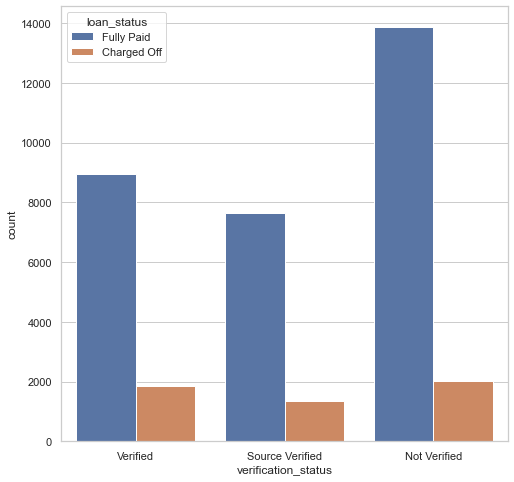

In [77]:
plt.figure(figsize=(8,8))
sns.countplot(loan["verification_status"], hue ='loan_status',data = loan)
plt.show()

#####  Insights: It seems like there are more 'Not Verified' accounts than 'Verified' accounts. It might be a potential risk to the business and company has to focus on more of the 'Verified' accounts.

## Purpose

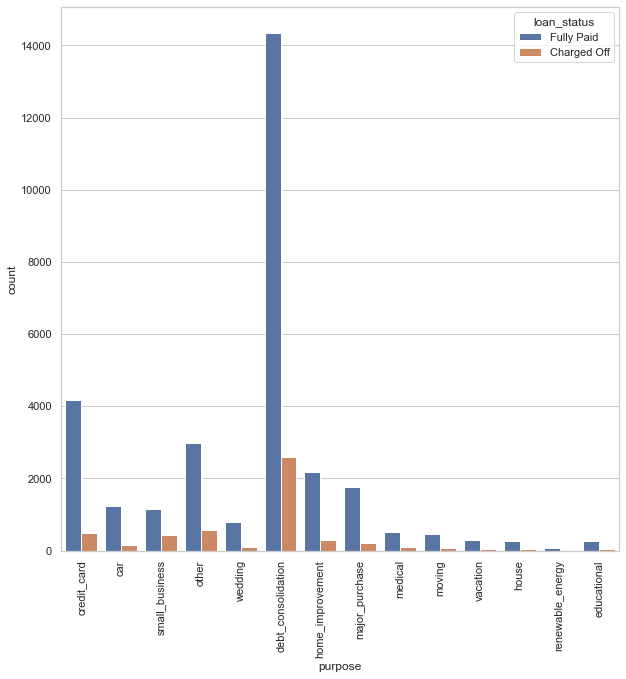

In [78]:
plt.figure(figsize=(10,10))
sns.countplot(loan["purpose"], hue ='loan_status',data = loan)
plt.xticks(rotation=90)
plt.show()

##### Insights: From the above chart top 2 purposes for applying the loans shows as 'debt consolidation' & 'credit card'. Seems a lot of people are trapped in the credit card and other loans, they are trying to close their exisiting loan accounts in order to get relieved from them. (Taking the new loans to close the exisiting ones).

In [79]:
addr_state_per = (loan['addr_state'].value_counts(normalize = True))*100
addr_state_per

CA    17.904799
NY     9.447185
FL     7.201727
TX     6.798049
NJ     4.633887
PA     3.899417
IL     3.848957
VA     3.588248
GA     3.506952
MA     3.313523
OH     3.131307
MD     2.671563
AZ     2.158556
WA     2.102489
CO     2.018390
NC     1.948307
CT     1.836174
MI     1.822157
MO     1.754878
MN     1.586679
NV     1.241870
SC     1.213837
OR     1.160574
WI     1.152164
AL     1.138148
LA     1.096098
KY     0.840996
OK     0.773716
UT     0.664387
KS     0.655977
AR     0.619534
DC     0.546647
RI     0.515811
NM     0.484974
WV     0.451334
HI     0.440121
NH     0.414891
DE     0.297152
MT     0.215856
WY     0.213052
AK     0.193429
SD     0.171002
VT     0.148576
MS     0.053263
TN     0.047656
IN     0.025230
IA     0.014017
NE     0.014017
ID     0.014017
ME     0.008410
Name: addr_state, dtype: float64

##### Insights: From the above data it shows as a lot of borrowers are from CA & NY. Maybe it's due to high in population in those states. But we don't have the population data to confirm that.

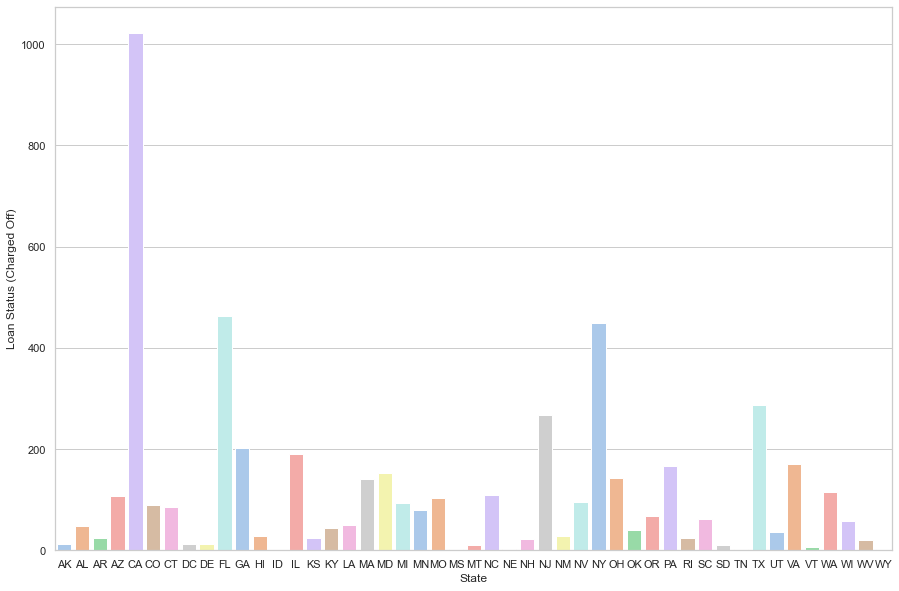

In [144]:
df_state = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='addr_state', y='loan_status', data=df_state, palette='pastel')
plt.xlabel('State')
plt.ylabel('Loan Status (Charged Off)')
plt.show()

##### Insights: From the above bar chart it CA, NY & FL has high charged off loans.

In [80]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'issue_y', 'issue_m', 'loan_status_num'],
      dtype='object')

### Amount funded by the investors

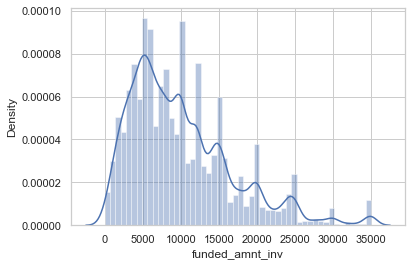

In [113]:
sns.distplot(loan['funded_amnt_inv'])
plt.show()

##### Insights: Majority of Amount funded by invertors is 5000

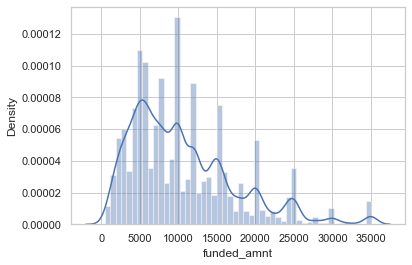

In [108]:
sns.distplot(loan['funded_amnt'])

plt.show()

In [83]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35672 non-null  int64  
 1   funded_amnt          35672 non-null  int64  
 2   funded_amnt_inv      35672 non-null  float64
 3   term                 35672 non-null  object 
 4   int_rate             35672 non-null  float64
 5   installment          35672 non-null  float64
 6   grade                35672 non-null  object 
 7   sub_grade            35672 non-null  object 
 8   emp_title            34429 non-null  object 
 9   emp_length           35672 non-null  object 
 10  home_ownership       35672 non-null  object 
 11  annual_inc           35672 non-null  float64
 12  verification_status  35672 non-null  object 
 13  loan_status          35672 non-null  object 
 14  purpose              35672 non-null  object 
 15  addr_state           35672 non-null 

## Bi-Variate Analysis

#### Grade vs Interest rate

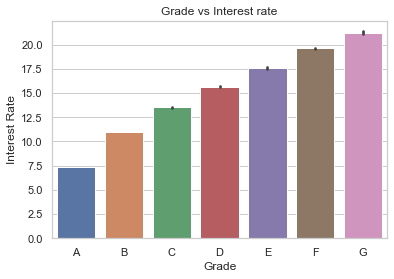

In [82]:
sns.barplot(data=loan,x='grade',y='int_rate',order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Grade vs Interest rate',fontsize=12)
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

##### Insights: Interest rates are high for lower grades of borrowers. It seems a good strategy and the grading system in the company works well and they can continue using this.

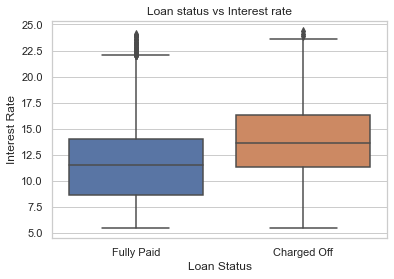

In [115]:
sns.boxplot(y='int_rate', x='loan_status', data=loan)
plt.title('Loan status vs Interest rate',fontsize=12)
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.show()

##### Insights: It shows that Charged Off loans has higher interest rates and I think it's a good strategy to handle the risk.

#### Purpose vs Interest rate

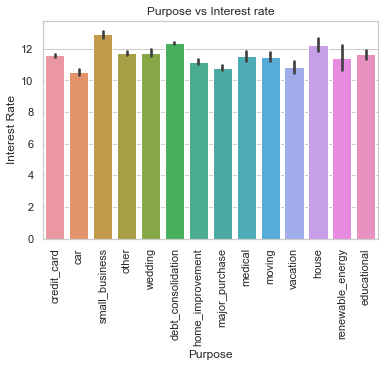

In [85]:
sns.barplot(data=loan,x='purpose',y='int_rate')
plt.xticks(rotation=90)
plt.title('Purpose vs Interest rate',fontsize=12)
plt.xlabel("Purpose")
plt.ylabel("Interest Rate")
plt.show()

##### Insights: It looks like highest interest rates (above 12%) are given to small business, debt consolidation & House.
##### It seems company identified these loans borrowers are at risk and they have increased their interest rates. However, we need to look at other driving factors to see if we need to continue offering the high interest rates to these borrowers.
##### Example: Small business group of borrowers maybe a potential risk.

### Analyzing 'annual income' with other columns for more insights

#### Annual Income vs Loan Purpose

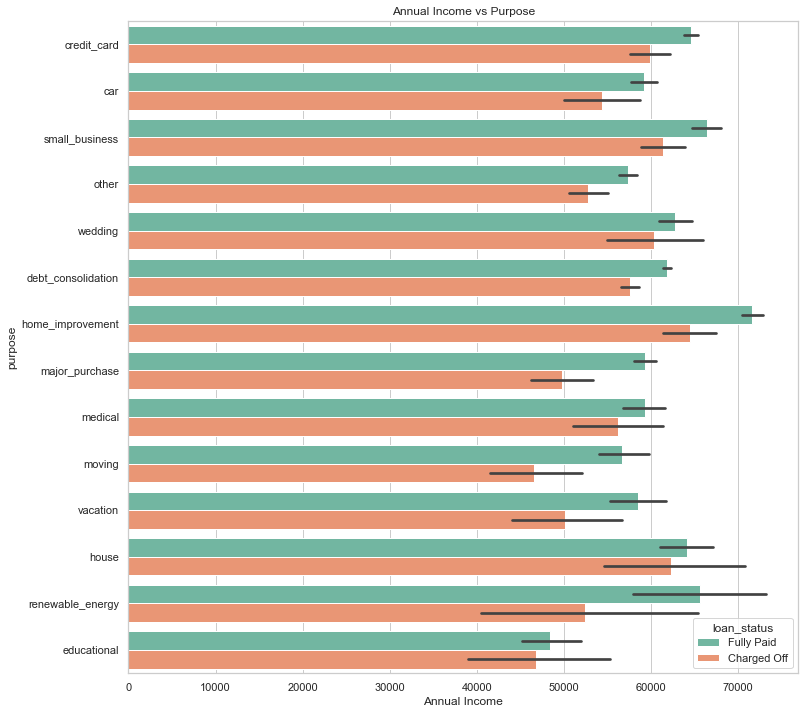

In [116]:
plt.figure(figsize=(12,12))
sns.barplot(data=loan, x='annual_inc', y='purpose', hue='loan_status', palette = 'Set2')
plt.title('Annual Income vs Purpose',fontsize=12)
plt.xlabel('Annual Income')
plt.show()

##### Insights: From the above Analysis, we can say that borrowers with higher salary has largely applied loans for purposes such as 'home improvement', 'house', 'renewable energy' and 'small business'
##### There is a high probability of defaulting when borrowers take loan for 'home improvement', 'house', 'small business' with a income of 60K-70K

#### Annual Income vs Home ownership

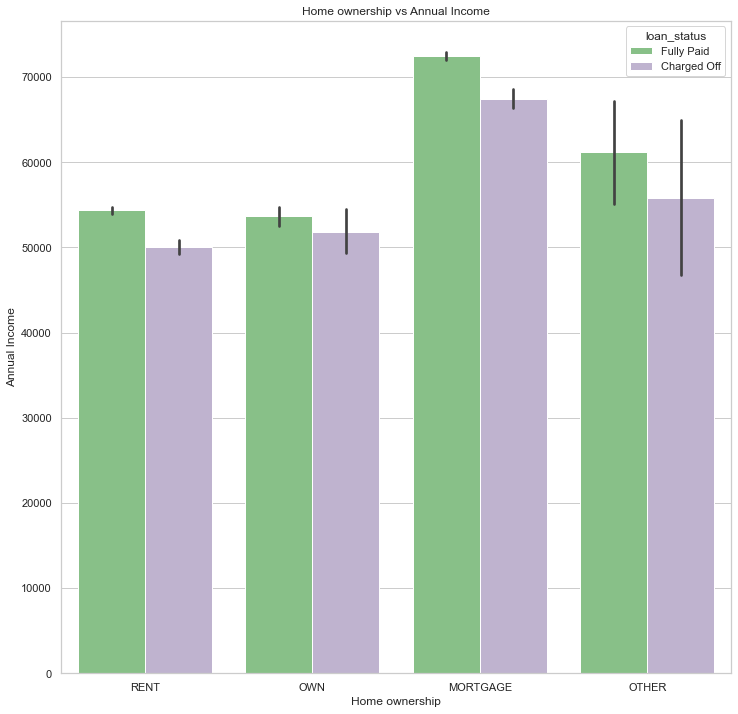

In [117]:
plt.figure(figsize=(12,12))
sns.barplot(data=loan, x='home_ownership', y='annual_inc', hue ='loan_status',palette="Accent")
plt.title('Home ownership vs Annual Income',fontsize=12)
plt.xlabel('Home ownership')
plt.ylabel('Annual Income')
plt.show()

##### Insights: It looks like borrowers who has an income of  60K - 70K takes the Mortgage loan, more likely to be defaulted. So, the company has to reduce the number of loans to be approved in this category.

### Loan Amount vs Home ownership

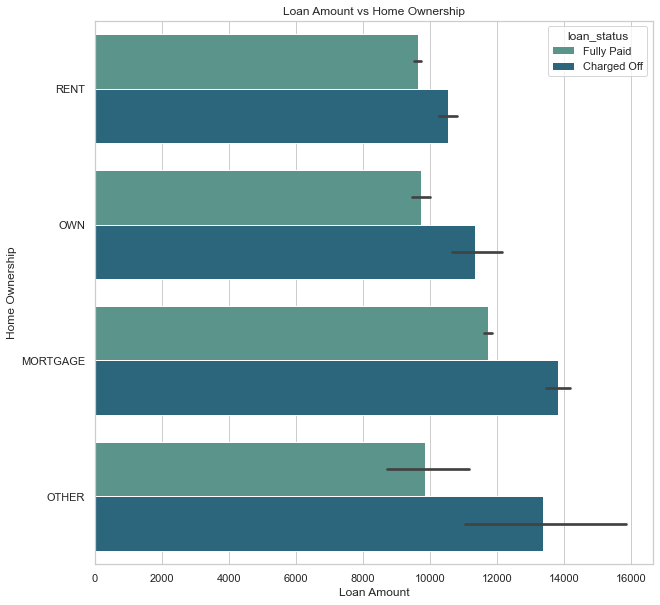

In [119]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="crest")
plt.title('Loan Amount vs Home Ownership',fontsize=12)
plt.xlabel('Loan Amount')
plt.ylabel('Home Ownership')
plt.show()

##### Insights: From the above chart the loan amount is higher for mortgage loans. It seems company's loan amount strategy is well defined because buying the house required more amount and also when the borrowers getting defaulted the company has an option of auction the property to get the money back. So, the point is even though the defaulters and the loan amount are higher in mortgage its fine for the company to offer more mortgage loans because the risk seems to be lower.

### Verification Status vs Loan amount

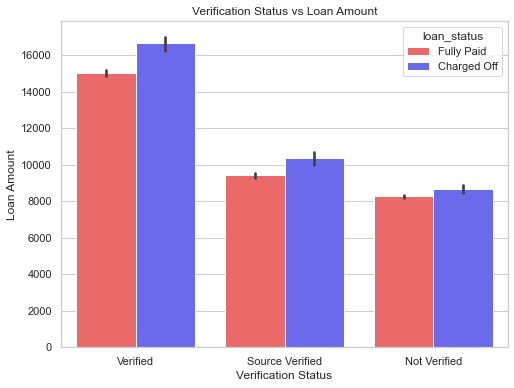

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(data=loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="seismic_r")
plt.title('Verification Status vs Loan Amount',fontsize=12)
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()

- ##### Insights: In the Not Verified case the company has given the loan amount less than 10K and from the above observation charged off cases in Not verified is so lower than the Verified with higher loan amount.
- ##### Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

### Interest Rate Vs Grade

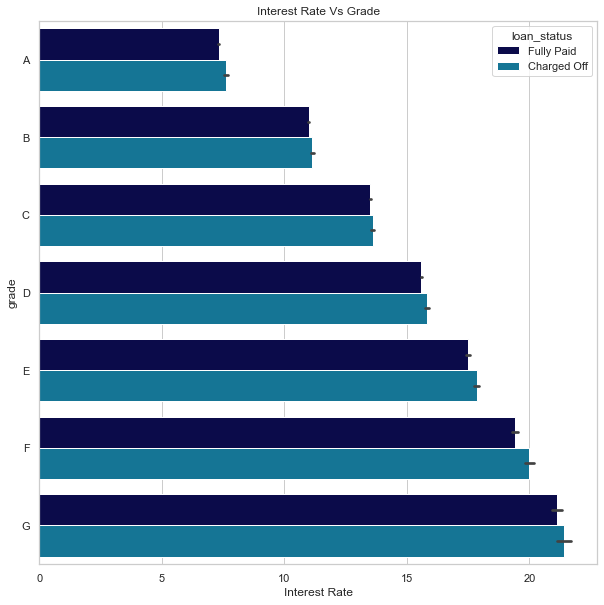

In [122]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='int_rate', y='grade', hue ='loan_status',palette="ocean", order=['A','B','C','D','E','F','G'])
plt.title('Interest Rate Vs Grade',fontsize=12)
plt.xlabel('Interest Rate')
plt.show()

##### Insights: The company has given the higher interest rates for lower grade borrowers E,F,G in order to mitigatge the risk. We think the company can continue this strategy. However, giving the loans to lower grade borrowers always riskier.

In [91]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35672 non-null  int64  
 1   funded_amnt          35672 non-null  int64  
 2   funded_amnt_inv      35672 non-null  float64
 3   term                 35672 non-null  object 
 4   int_rate             35672 non-null  float64
 5   installment          35672 non-null  float64
 6   grade                35672 non-null  object 
 7   sub_grade            35672 non-null  object 
 8   emp_title            34429 non-null  object 
 9   emp_length           35672 non-null  object 
 10  home_ownership       35672 non-null  object 
 11  annual_inc           35672 non-null  float64
 12  verification_status  35672 non-null  object 
 13  loan_status          35672 non-null  object 
 14  purpose              35672 non-null  object 
 15  addr_state           35672 non-null 

In [92]:
loan.dti.describe()

count    35672.000000
mean        13.457607
std          6.649273
min          0.000000
25%          8.370000
50%         13.590000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [93]:
# Create derived variable 
loan['dti_bin'] = pd.cut(loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

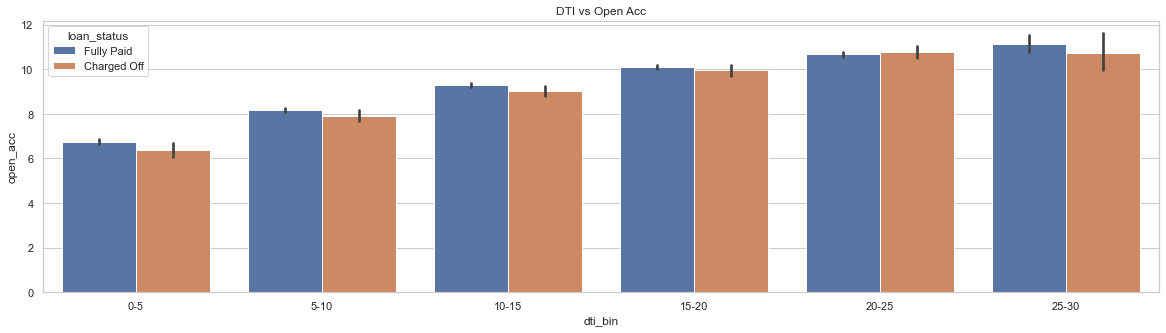

In [124]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan, estimator=np.mean)
plt.title('DTI vs Open Acc',fontsize=12)
plt.show()

##### Insights: From the above chart higher the dti the number of open accounts are more. The company has to focus more on lower dti loan applicants and stop approving the loans for higher dti applicants.

In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            35672 non-null  int64   
 1   funded_amnt          35672 non-null  int64   
 2   funded_amnt_inv      35672 non-null  float64 
 3   term                 35672 non-null  object  
 4   int_rate             35672 non-null  float64 
 5   installment          35672 non-null  float64 
 6   grade                35672 non-null  object  
 7   sub_grade            35672 non-null  object  
 8   emp_title            34429 non-null  object  
 9   emp_length           35672 non-null  object  
 10  home_ownership       35672 non-null  object  
 11  annual_inc           35672 non-null  float64 
 12  verification_status  35672 non-null  object  
 13  loan_status          35672 non-null  object  
 14  purpose              35672 non-null  object  
 15  addr_state         

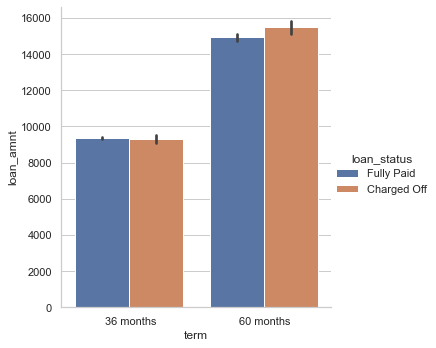

In [96]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')


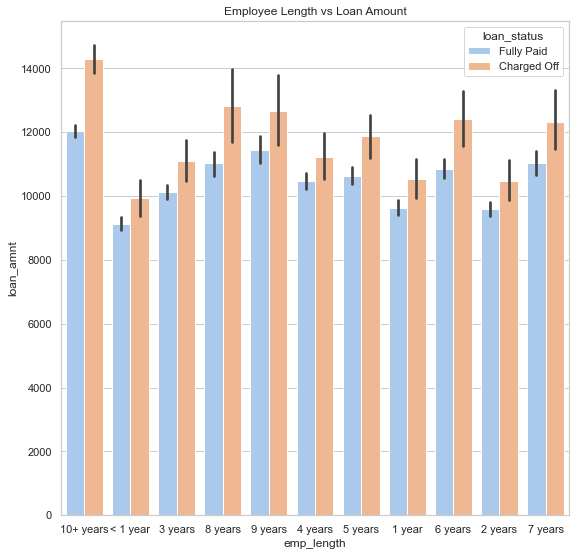

In [127]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.title('Employee Length vs Loan Amount',fontsize=12)
plt.show()


##### Insights: Borrowers with longer working history got the loan approved for the higher loan amount